# Automatic Zebra and Impala Detection
## IEEE AFRICON 2023

# Manual Annotation

We collect 200 to 400 images per week.

Human annotation is laborious, automatic detection of animals in images or videos reduces the time taken.

Also, if we are at larger scales say collection of thousands, tens of thousands or hundred of thousands of images manual annotation will become unreasonable.

# Automatic Impala and Zebra Detection in Images and Videos

70 % of the images with animals have either an impala or a zebra 

We could also do automatic false trigger or non-animal trigger detection since 60% to 80% of the raw unpublished data  was either a false trigger or triggered by a human , birds or even insects. 

The purpose here is to locate the animals in images and videos, detect which animal it is then verify.  

In [1]:
#file and folder libraries
import pandas as pd
import numpy as np

#system libraries
import os
os.makedirs('output', exist_ok = True)
from datetime import datetime

#Mapping libraries
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
#this is a open source pretrained model
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
#load animal detection model
#model = torch.hub.load('ultralytics/yolov5', 'custom', path=r'models/lasst.pt',verbose=False,source='local')
model = torch.hub.load(r'yolov5', 'custom', path=r'models/lasst.pt', source='local',force_reload=True)
print('Detection model has loaded')

#Set the confidence which you require from the model
model.conf = 0.45

YOLOv5  v7.0-211-g94e943e Python-3.11.4 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients
Adding AutoShape... 


Detection model has loaded


image 1/1: 720x1280 1 impala
Speed: 136.2ms pre-process, 997.0ms inference, 29.9ms NMS per image at shape (1, 3, 384, 640)


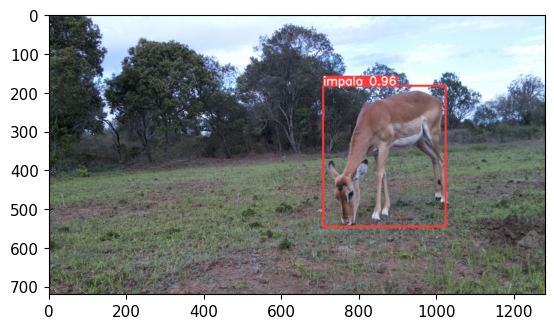

In [4]:
file = 'impala'
results = model('dataset/images/'+file+'.jpg')
print(results)
%matplotlib inline
pred = np.squeeze(results.render())
plt.imshow(pred)
plt.show()
plt.imsave('output/'+file+'_detected.jpg',pred)

image 1/1: 720x1280 1 other
Speed: 53.3ms pre-process, 712.1ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)


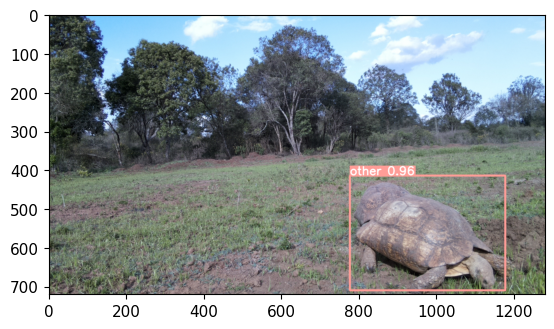

In [5]:
file = 'tortoise'
results = model('dataset/images/'+file+'.jpg')
print(results)
%matplotlib inline
pred = np.squeeze(results.render())
plt.imshow(pred)
plt.show()
plt.imsave('output/'+file+'_detected.jpg',pred)

image 1/1: 720x1280 1 other
Speed: 33.7ms pre-process, 720.3ms inference, 11.5ms NMS per image at shape (1, 3, 384, 640)


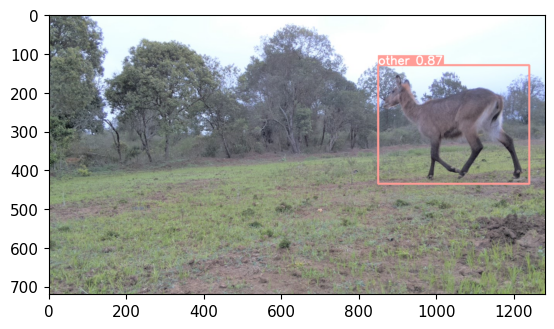

In [6]:
file = 'waterbuck'
results = model('dataset/images/'+file+'.jpg')
print(results)
%matplotlib inline
pred = np.squeeze(results.render())
plt.imshow(pred)
plt.show()
plt.imsave('output/'+file+'_detected.jpg',pred)

image 1/1: 720x1280 4 impalas, 1 other
Speed: 34.3ms pre-process, 736.2ms inference, 13.6ms NMS per image at shape (1, 3, 384, 640)


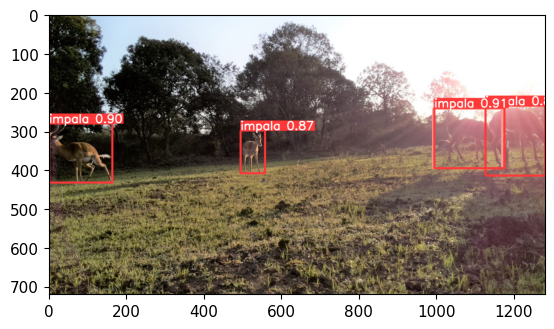

In [7]:
file = 'impalas-warthogs'
results = model('dataset/images/'+file+'.jpg')
print(results)
%matplotlib inline
pred = np.squeeze(results.render())
plt.imshow(pred)
plt.show()
plt.imsave('output/'+file+'_detected.jpg',pred)

## Automatic detection on multiple images

- It took 2 weeks to manually annotate 8554 images

- Automatically it takes about an hour and 20 minutes but it crashed my computer.

- This was a rate of 25 images per hour